In [3]:
import matplotlib.pyplot as plt
import contextily as ctx
import osmnx as ox
import geopandas as gpd
import geodatasets
import folium

In [63]:
attr_osmnx="Map data from OpenStreetMap. \n Created using OSMnx"
# reveal.js Solarized colors https://github.com/hakimel/reveal.js/blob/master/css/theme/source/solarized.scss
base03_colour = "#002b36"
base02_colour = "#073642"
base01_colour = "#586e75"
base00_colour = "#657b83"
base0_colour = "#839496"
base1_colour = "#93a1a1"
base2_colour = "#eee8d5"
base3_colour = "#fdf6e3"
yellow_colour = "#b58900"
orange_colour = "#cb4b16"
red_colour = "#dc322f"
magenta_colour = "#d33682"
violet_colour = "#6c71c4"
blue_colour = "#268bd2"
cyan_colour = "#2aa198"
green_colour = "#859900"


In [ ]:
# Create interative map with geopandas
countries = gpd.read_file(geodatasets.get_path('naturalearth.land'))
countries.explore()

Text(0.005, 0.005, 'Tiles &copy; Esri &mdash; National Geographic, Esri, DeLorme, NAVTEQ, UNEP-WCMC, USGS, NASA, ESA, METI, NRCAN, GEBCO, NOAA, iPC')

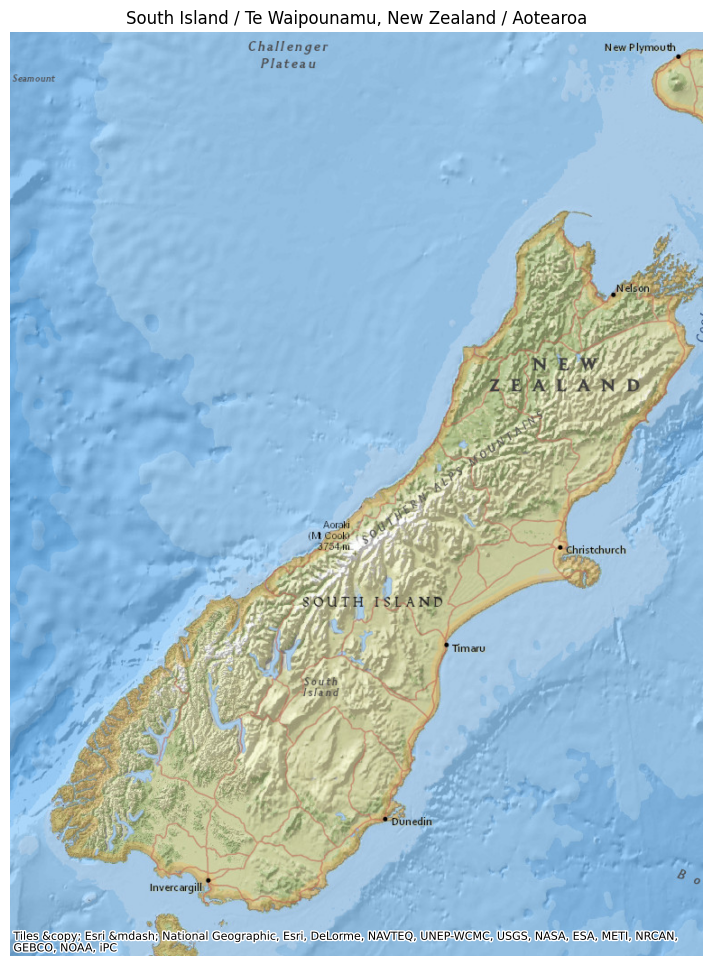

In [ ]:
# Create a static NZ map using contextily
place = ctx.Place('south island, new zealand',source='https://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/tile/{z}/{y}/{x}')
base_ax = place.plot() 
attr =  'Tiles &copy; Esri &mdash; National Geographic, Esri, DeLorme, NAVTEQ, UNEP-WCMC, USGS, NASA, ESA, METI, NRCAN, GEBCO, NOAA, iPC'
ctx.add_attribution(ax=base_ax,text=attr)



Text(0.005, 0.005, '(C) OpenStreetMap contributors (C) CARTO | Geological data: MacroStrat.org (CC-BY)')

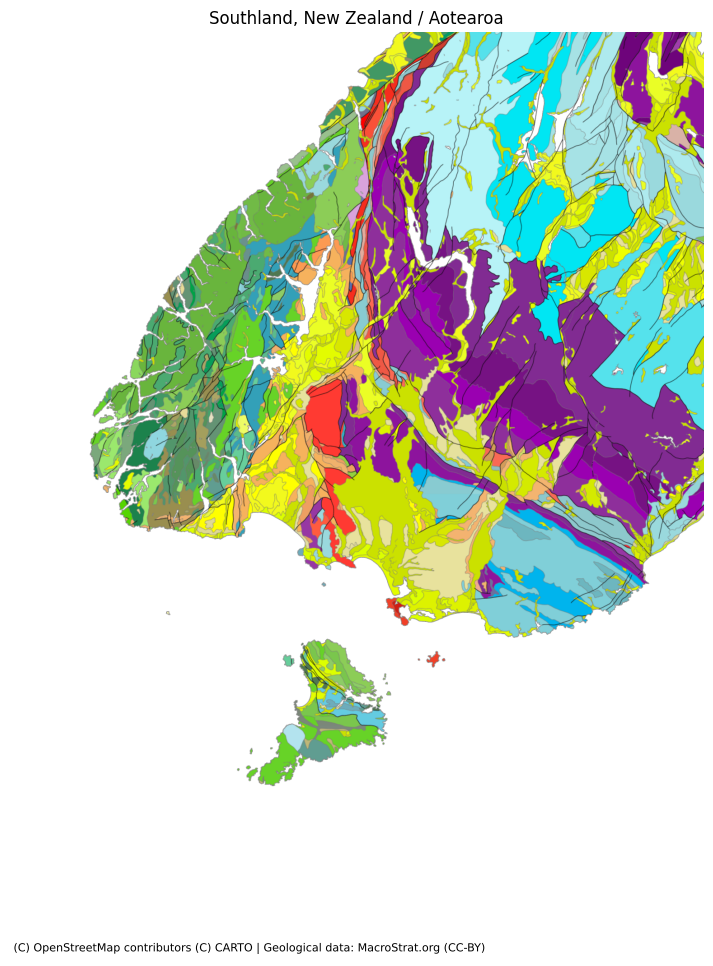

In [ ]:
# Create a colourful static Southland map using contextily
basemap = ctx.providers.CartoDB.Positron
place = ctx.Place('Southland,New Zealand', source='https://tiles.macrostrat.org/carto/{z}/{x}/{y}.png')
base_ax = place.plot() 
attr =  basemap.attribution +' | Geological data: MacroStrat.org (CC-BY)'
ctx.add_attribution(ax=base_ax,text=attr)


c:\Users\ddobs\Documents\art-of-maps-2\.venv\Lib\site-packages\osmnx\_overpass.py:267: UserWarning: This area is 26 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


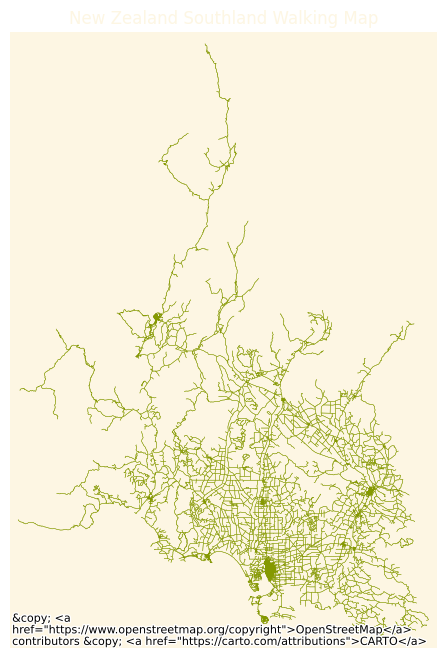

In [ ]:
# Create Southland walking trails with matplotlib and osmnx 
place ="Southland, New Zealand"
gdf = ox.geocoder.geocode_to_gdf([place])
G = ox.graph.graph_from_place(place, network_type="walk", simplify=True)
fig, ax = ox.plot.plot_graph(
    G,
    show=False,
    close=False,
    bgcolor=base3_colour,
    edge_color=green_colour,
    edge_linewidth=0.3,
    node_size=0,
)
gdf.plot(ax=ax, fc=base3_colour, ec=None, lw=1, alpha=1, zorder=-1)
plt.title("New Zealand Southland Walking Map",color=base3_colour)
ctx.add_attribution(ax, attr_osmnx)
plt.show()

In [ ]:
# Create Southland walking trails with matplotlib and osmnx with basemap
place ="Southland, New Zealand"
gdf = ox.geocoder.geocode_to_gdf([place])
G = ox.graph.graph_from_place(place, network_type="walk", simplify=True)
fig, ax = ox.plot.plot_graph(
    G,
    show=False,
    close=False,
    bgcolor=base3_colour,
    edge_color=green_colour,
    edge_linewidth=0.3,
    node_size=0,
)
gdf.plot(ax=ax, fc=base3_colour, ec=None, lw=1, alpha=1, zorder=-1)
plt.title("New Zealand Southland Walking Map",color=base3_colour)
ctx.add_basemap(ax)
plt.show()

c:\Users\ddobs\Documents\art-of-maps-2\.venv\Lib\site-packages\osmnx\_overpass.py:267: UserWarning: This area is 26 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


KeyboardInterrupt: 

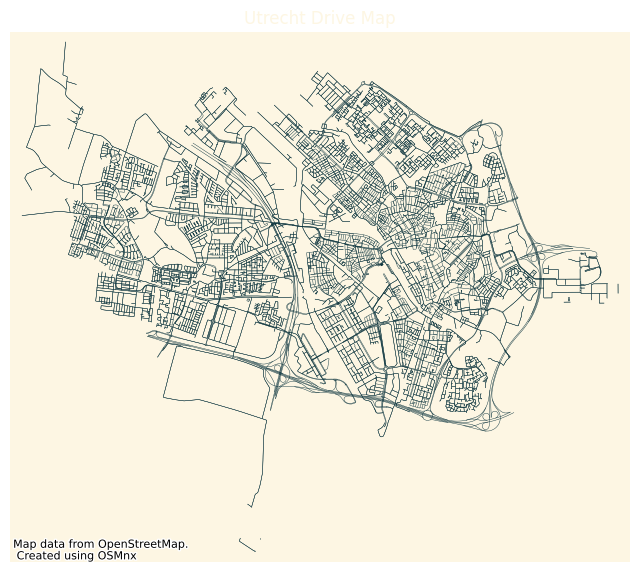

In [ ]:
# Create Road map of Utrecht with matplotlib and osmnx 
place ="Utrecht, Netherlands"
gdf = ox.geocoder.geocode_to_gdf([place])
G = ox.graph.graph_from_place(place, network_type="drive", retain_all=True)
fig, ax = ox.plot.plot_graph(
    G,
    show=False,
    close=False,
    bgcolor=base3_colour,
    edge_color=base03_colour,
    edge_linewidth=0.3,
    node_size=0,
)
gdf.plot(ax=ax, fc=base3_colour, ec=None, lw=1, alpha=1, zorder=-1)
plt.title("Utrecht Drive Map",color=base3_colour)
ctx.add_attribution(ax, attr_osmnx)
plt.show()

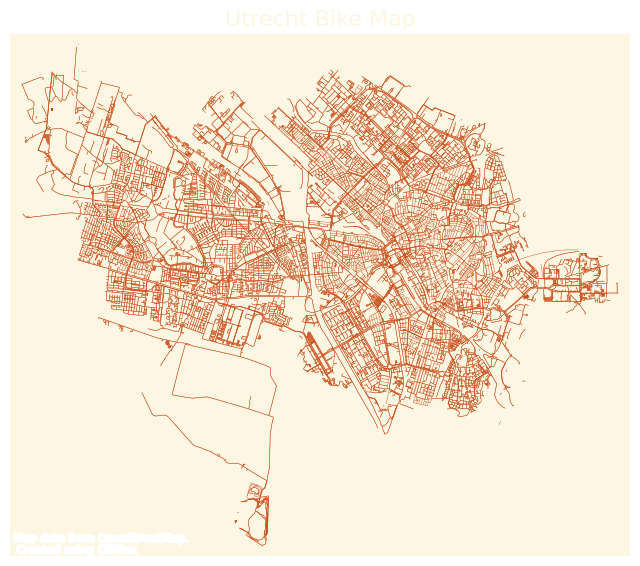

In [99]:
# Create Bike map of Utrecht with matplotlib and osmnx 
place ="Utrecht, Netherlands"
gdf = ox.geocoder.geocode_to_gdf([place])
plt.style.use('Solarize_Light2')
G = ox.graph.graph_from_place(place, network_type="bike", retain_all=True)
fig, ax = ox.plot.plot_graph(
    G,
    show=False,
    close=False,
    bgcolor=base3_colour,
    edge_color=orange_colour,
    edge_linewidth=0.3,
    node_size=0,
)
gdf.plot(ax=ax, fc=base3_colour, ec=None, lw=1, alpha=1, zorder=-1)
plt.title("Utrecht Bike Map", color=base3_colour)
ctx.add_attribution(ax, attr_osmnx)
plt.show()

In [14]:
# Get volcano data
# Data Source : https://magma.esdm.go.id/v1/edukasi/tipe-gunung-api-di-indonesia-a-b-dan-c
df = pd.read_csv("volcanoes.csv")
df.head()

Type        Volcano  Latitude  Longitude    Region
0    A  Seulawah Agam  5.447028  95.656664  Sumatera
1    A     Peut Sague  4.902609  96.288863  Sumatera
2    A   Burni Telong  4.766995  96.824227  Sumatera
3    A       Sinabung  3.169905  98.391041  Sumatera
4    A   Sorik Marapi  0.685781  99.536326  Sumatera

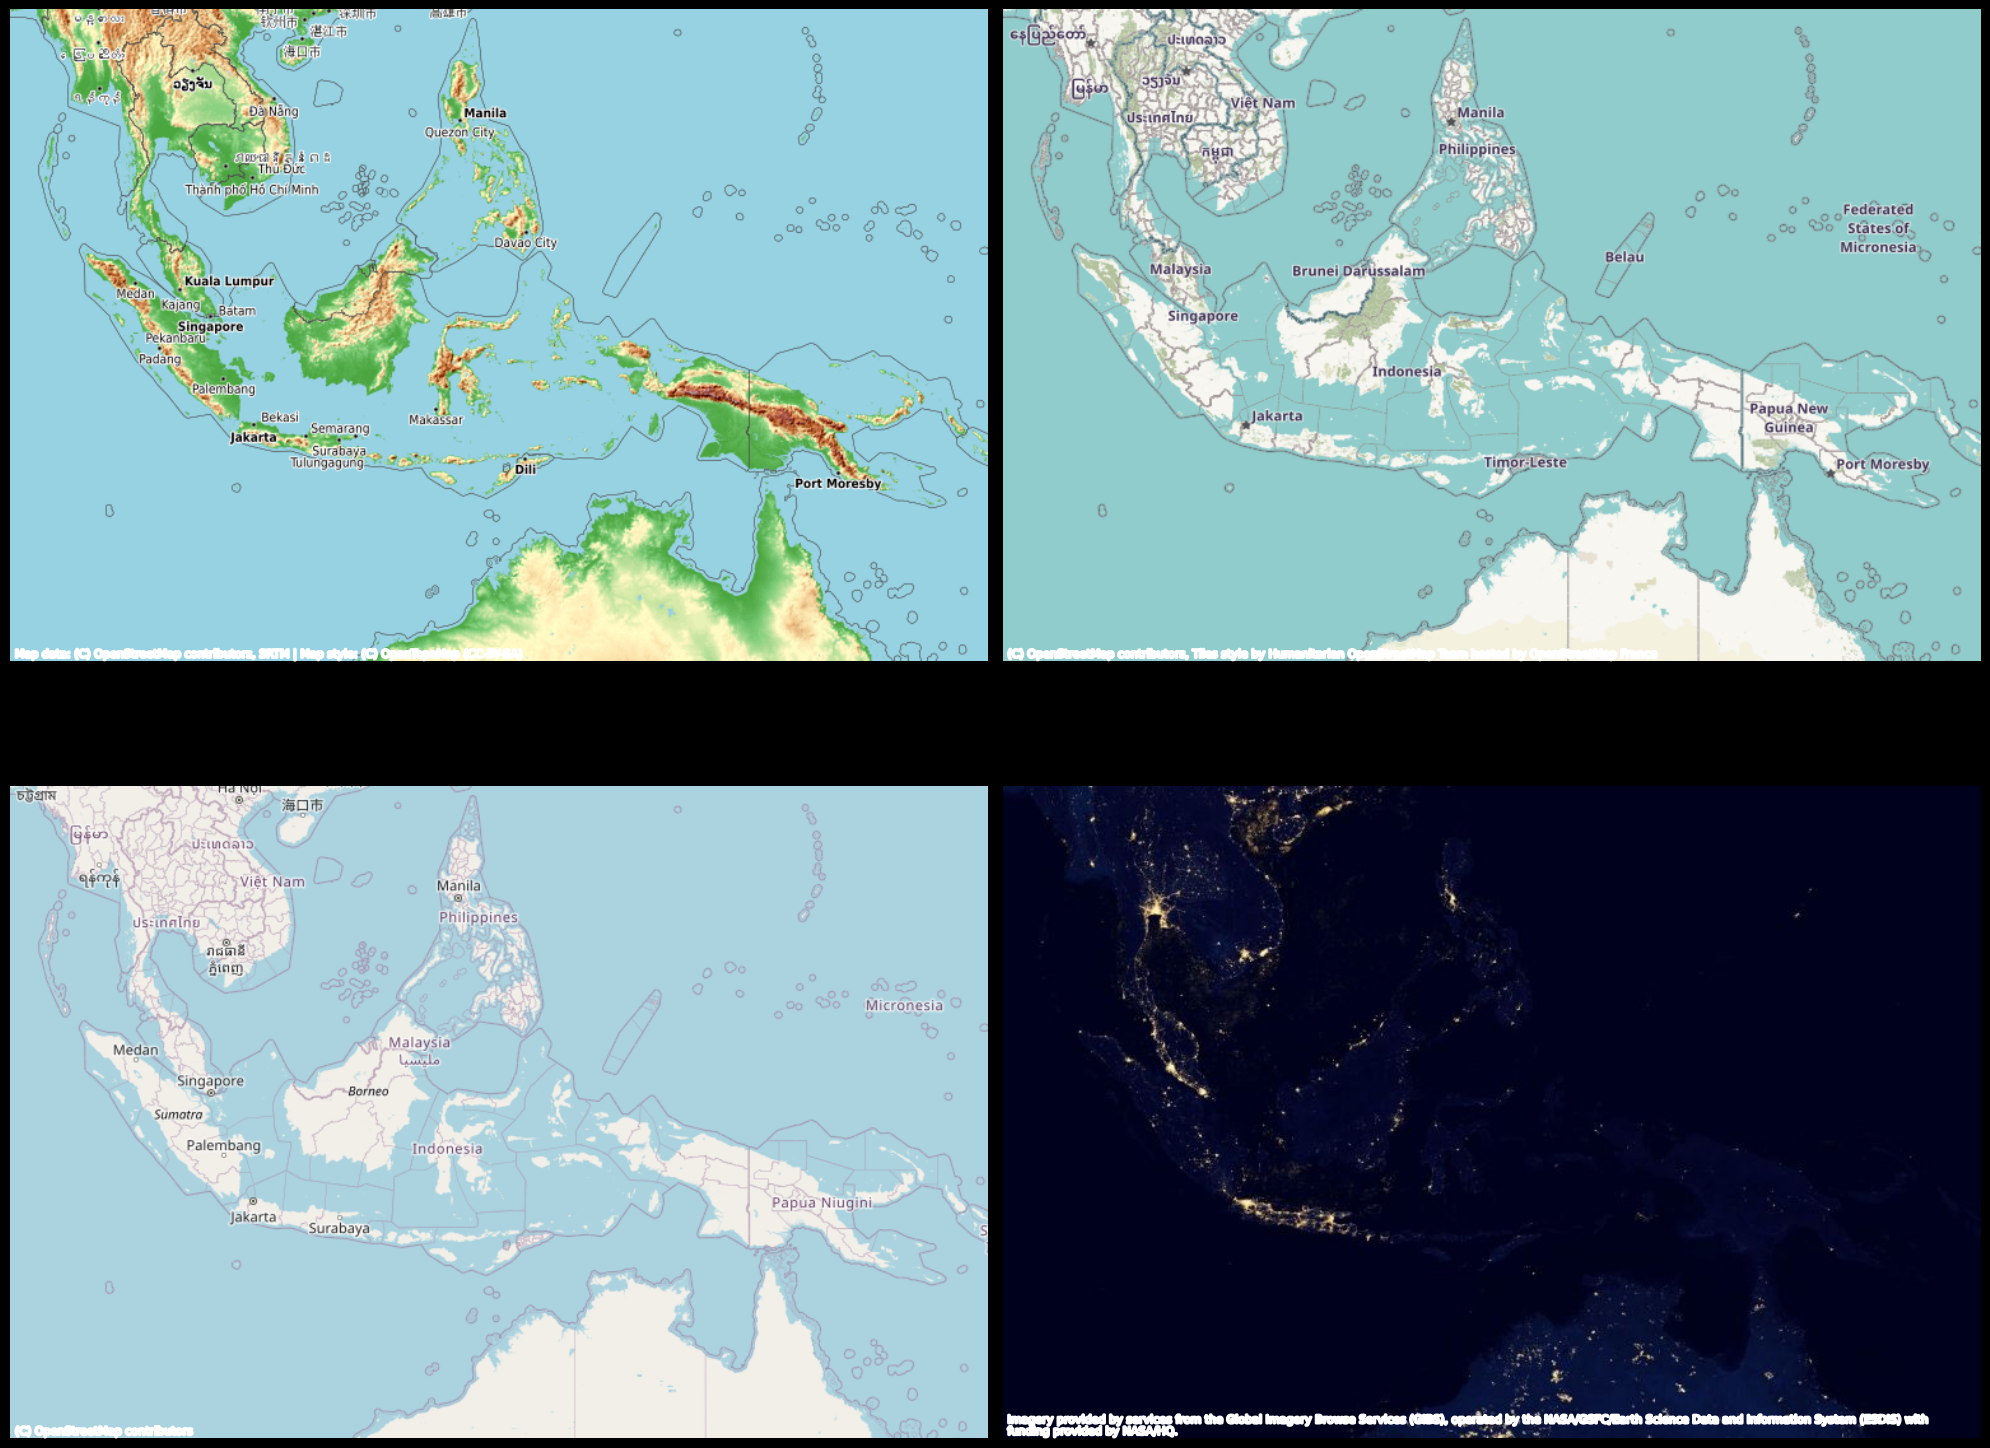

In [96]:
# Create a static Indonesia map using contextily
fig, axs = plt.subplots(2,2, figsize=(20,20))
for i, source in enumerate([ctx.providers.OpenTopoMap,
               ctx.providers.OpenStreetMap.HOT,
               ctx.providers.OpenStreetMap.Mapnik,
               ctx.providers.NASAGIBS.ViirsEarthAtNight2012
              ]):
    ax = ctx.Place("Indonesia", source=source).plot(ax=axs.flatten()[i])
    ax.axis("off")
    plt.tight_layout()


Text(0.005, 0.005, 'Data source MAGMA Indonesia.')

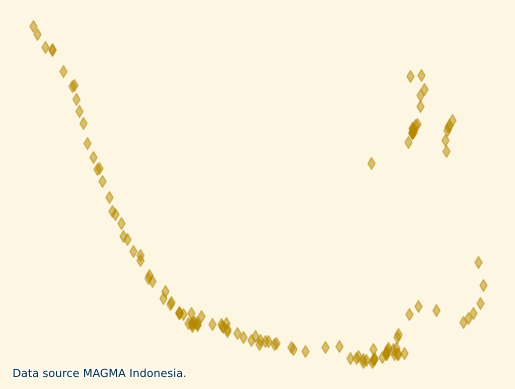

In [112]:
# Create a static Indonesia volcano map using matplotlib
fig, ax = plt.subplots() # Adjust figsize as needed
plt.style.use('Solarize_Light2')
ax.set_axis_off()
ax.scatter(df['Longitude'], df['Latitude'], marker='d', color=red_colour, alpha=0.5)
attr =  ''
ctx.add_attribution(ax=ax,text='Data source MAGMA Indonesia.',color=base03_colour)

